### Geração de Patches em Espiral


In [1]:
from PIL import Image
import numpy as np
import random
random.seed(10)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pickle

In [2]:
path_image = "../../data/base_recortada/ASC-H/10.png"
im = Image.open(path_image)
im.format, im.size, im.mode

('PNG', (90, 90), 'RGB')

In [3]:
def visualize_patch_centers(image, centers, patch_size):
    fig, ax = plt.subplots(1)
    
    image_np = np.array(image)
    
    if image_np.max() > 1:
        image_np = image_np / 255.0
    
    ax.imshow(image_np)
    
    patch_height, patch_width = patch_size
    
    for (w, h) in centers:
        rect = patches.Rectangle(
            (w - patch_width // 2, h - patch_height // 2), 
            patch_width, patch_height,
            linewidth=1, edgecolor='red', facecolor='none'
        )
        ax.add_patch(rect)
        plt.plot(w, h, marker='v', color='r')
    
    ax.set_xlim([0, image_np.shape[1]])
    ax.set_ylim([image_np.shape[0], 0])
    plt.axis('off')
    plt.show()

[(112, 112), (114, 114), (109, 110), (117, 115), (106, 111), (119, 114), (104, 112), (121, 111), (103, 115), (122, 108), (103, 118), (121, 105), (104, 121), (119, 102), (107, 124), (116, 99), (110, 127), (113, 98), (114, 128), (108, 97), (119, 128), (104, 98), (123, 126), (99, 101), (127, 123), (96, 104), (131, 119), (93, 109), (133, 113), (92, 115), (133, 107), (92, 121), (132, 101), (95, 127), (128, 96), (99, 132), (124, 91), (104, 136), (117, 88), (111, 138), (110, 86), (119, 139), (102, 87), (126, 137), (95, 90), (133, 133), (89, 95), (139, 126), (84, 102), (143, 119), (81, 111), (144, 110), (81, 120), (143, 101), (83, 129), (139, 92), (88, 137), (133, 85), (96, 144), (125, 79), (105, 148), (115, 76), (115, 150), (105, 76), (126, 149), (94, 78), (136, 144), (85, 84), (145, 137), (77, 93), (151, 128), (72, 103), (155, 116), (70, 115), (155, 104), (71, 127), (152, 92), (76, 139), (145, 81), (84, 149), (136, 72), (95, 156), (124, 67), (108, 160), (111, 64), (122, 161), (97, 66), (135,

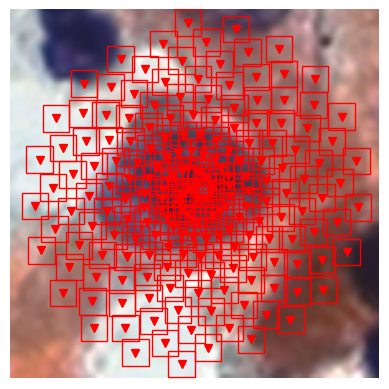

Quantidade de centros dentro da imagem: 196


In [4]:
def calculate_prox_coordenada_spiral(ponto, r, theta, base_radius=4, angle_increment=np.pi/4):
  x_new = ponto[0] + r * np.cos(theta)
  y_new = ponto[1] + r * np.sin(theta)
  
  radius_increment = max(1, base_radius / (1 + 0.1 * r))
  
  r += radius_increment
  theta += angle_increment
  
  return (round(x_new, 1), round(y_new,1)), r, theta



px_inicial = (112,112)

center = []


value, r, theta = calculate_prox_coordenada_spiral(px_inicial, 0, 0)
center.append(value)

while len(center) < 196:

  value, r, theta = calculate_prox_coordenada_spiral(center[-1], r, theta, base_radius=4, angle_increment=3)
  
  if (value[0] >=0 and value[1] >= 0) and (value[0] <= 224 and value[1] <= 224)  :
    
      center.append(value)


center = [(int(x), int(y)) for x, y in center]

print(center)
resized_image = im.resize((224,224))
visualize_patch_centers(resized_image, center, (16,16))  


cont = 0
for each in center:
  if (each[0] <= 224 and each[1] <= 224) and (each[0] >= 0 and each[1] >= 0):
    cont += 1
  
print(f"Quantidade de centros dentro da imagem: {cont}")

Salvando centers em arquivo pickle

In [5]:
with open('../../data/centros_pre_salvos/espiral_centers.pkl', 'wb') as handle:
    pickle.dump(center, handle, protocol=pickle.HIGHEST_PROTOCOL)